# Support Vector Machine (SVM)

## Introduction

In [125]:
Support vectors are the closest points to the hyerplane.

SyntaxError: invalid syntax (3089911889.py, line 1)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Iris Example (Linear)

### Load Data

In [ ]:
iris_data = pd.read_csv('files/iris_data.csv')

In [126]:
iris_data.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Extract Data

In [127]:
x_data = iris_data.drop(['sepal.length', 'sepal.width', 'species'], axis=1)
y_data = iris_data['species']

Let's only select samples with value Versicolor or setosa

In [128]:
setosa_or_versi = iris_data.loc[(iris_data['species'] == 'Versicolor') | (iris_data['species'] == 'Setosa')]
x_data = setosa_or_versi.drop(['sepal.length', 'sepal.width', 'species'], axis=1)
y_data = setosa_or_versi['species']

### Preprocess Data

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
le = LabelEncoder()
y_data = le.fit_transform(y_data)
y_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Analyze Data

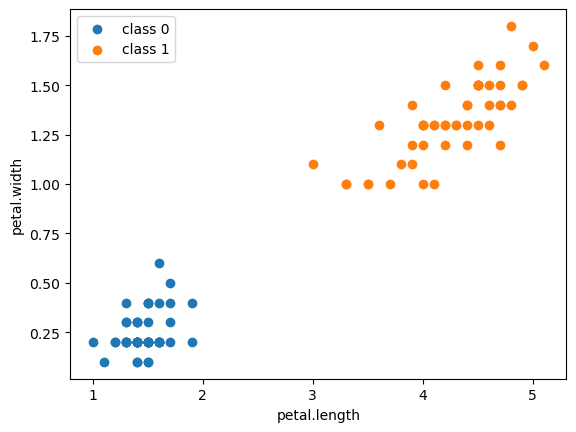

In [131]:
plt.scatter(x_data.loc[:,'petal.length'].loc[iris_data['species'] == 'Setosa'], x_data.loc[:,'petal.width'].loc[iris_data['species'] == 'Setosa'], label='class 0')
plt.scatter(x_data.loc[:,'petal.length'].loc[iris_data['species'] == 'Versicolor'], x_data.loc[:,'petal.width'].loc[iris_data['species'] == 'Versicolor'], label='class 1')
plt.xlabel('petal.length')
plt.ylabel('petal.width')
plt.legend()
plt.show()

Let's place the hyperplane which is in equal distance to support vectors.

### Split Data

In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

### Generate Model and train

In [133]:
from sklearn.svm import SVC

In [134]:
svm_model = SVC(kernel="linear", random_state=42)
svm_model = svm_model.fit(x_train, y_train)

### Predict

In [135]:
y_pred = svm_model.predict(x_test)

### Evaluate Results

In [136]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        12\n           1       1.00      1.00      1.00         8\n\n    accuracy                           1.00        20\n   macro avg       1.00      1.00      1.00        20\nweighted avg       1.00      1.00      1.00        20\n'

In [137]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[12,  0],
       [ 0,  8]])

In [138]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [139]:
# Weight terms
svm_model.coef_

array([[1.1769056 , 0.78337144]])

In [140]:
# Bias term
svm_model.intercept_

array([-3.39254856])

In [141]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2, label="SVM")
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

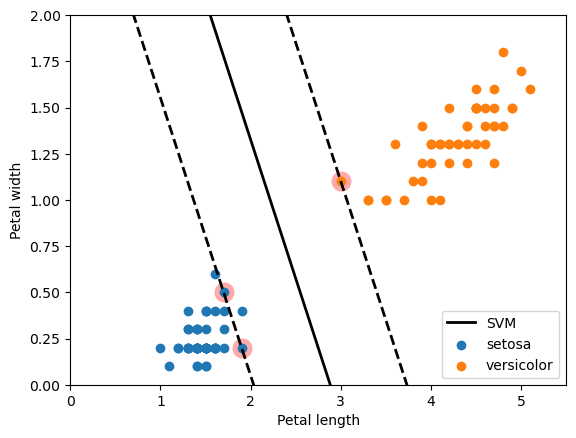

In [142]:
plot_svc_decision_boundary(svm_model, 0, 5.5)
plt.scatter(x_data.loc[:,'petal.length'].loc[iris_data['species'] == 'Setosa'], x_data.loc[:,'petal.width'].loc[iris_data['species'] == 'Setosa'], label='setosa')
plt.scatter(x_data.loc[:,'petal.length'].loc[iris_data['species'] == 'Versicolor'], x_data.loc[:,'petal.width'].loc[iris_data['species'] == 'Versicolor'], label='versicolor')
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([0, 5.5, 0, 2])
plt.legend()
plt.show()

In [143]:
svm_model.support_vectors_

array([[1.9, 0.2],
       [1.7, 0.5],
       [3. , 1.1]])

**NOTE**: Scaling on data is very important which affects the 

## Nonlinear SVM Example

### Load Data

In [144]:
from sklearn.datasets import make_moons

### Extract Data

In [145]:
x_data, y_data = make_moons(n_samples=100, noise=0.15, random_state=60)

In [146]:
def plot_dataset(x, y, axes):
    plt.plot(x[:, 0][y==0], x[:, 1][y==0], "bs")
    plt.plot(x[:, 0][y==1], x[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0) 

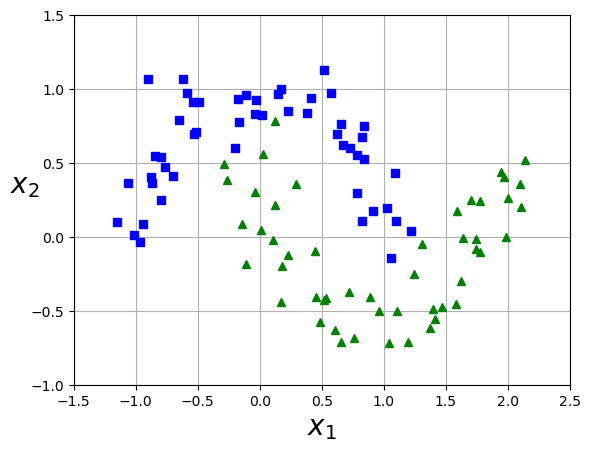

In [147]:
plot_dataset(x_data, y_data, [-1.5, 2.5, -1, 1.5])
plt.show()

We can not split the data in linear fashion. We can use polynomial fit

### Generate model w/ Pipeline

In [148]:
xs = np.array([[1,50], [5, 20], [3,80], [5,60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

In [149]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [150]:
svm_pipe = Pipeline([("scaler", StandardScaler()), ("svm_clf_pipe", SVC(kernel="linear", C=100))])

In [151]:
svm_pipe = svm_pipe.fit(xs, ys)

In [152]:
# Accessing individual model
svm_pipe["svm_clf_pipe"]

SVC(C=100, kernel='linear')

### Polynomial SVM Example

Make use of the same data set with the previous example

In [153]:
from sklearn.preprocessing import PolynomialFeatures

In [154]:
polynomial_svm_pipe = Pipeline([("scaler", StandardScaler()), 
                     ("poly_features", PolynomialFeatures(degree=3)),
                     ("svm_clf_pipe", SVC(kernel="linear", C=100))])

In [155]:
polynomial_svm_pipe = polynomial_svm_pipe.fit(x_data, y_data)

In [156]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s,x1s)
    x = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(x).reshape(x0.shape)
    y_decision = clf.decision_function(x).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

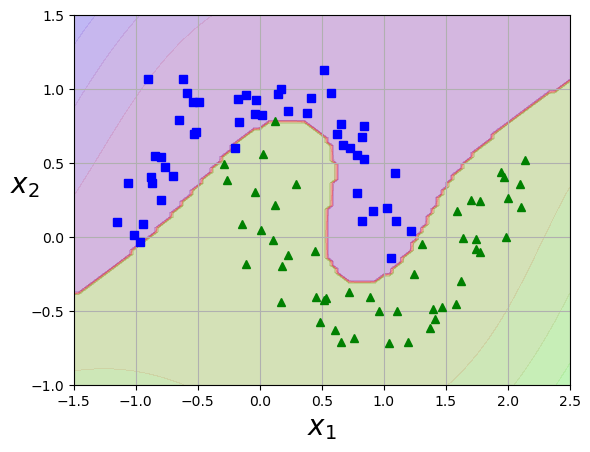

In [157]:
plot_predictions(polynomial_svm_pipe, [-1.5, 2.5, -1, 1.5])
plot_dataset(x_data, y_data, [-1.5, 2.5, -1, 1.5])
plt.show()

## References

- [Support Vector Machines](https://winder.ai/support-vector-machines/)
- [Kaggle- Support Vector machines](https://www.kaggle.com/code/hanyjr/support-vector-machines)